In [53]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#导入数据，因为SK_ID_CURR没有含义，先删除
data = pd.read_csv('../Data/application_train.csv')
data = data.drop(columns=['SK_ID_CURR'])
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [55]:
#查看目标变量为空的行数
data['TARGET'].isnull().sum()
#data = data.dropna(axis=0, thresh=None, subset=["loan_status"])

0

In [56]:
instance_number = data.shape[0]
deleted_feature = []
#清洗缺省值高于50%的特征
for col in data.columns:
    if data[col].isnull().sum()/instance_number > 0.50:
        deleted_feature.append(col)
        data = data.drop(columns = [col])
        
print(deleted_feature)
data.head()

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#分离X和Y
X = data.drop(columns=['TARGET'])
Y = data['TARGET']

In [58]:
float_feature = []
int_feature = []
object_feature = []

for col in X.columns:
    if X[col].ftype == 'float64:dense':
        float_feature.append(col)
    elif X[col].ftype == 'int64:dense':
        int_feature.append(col)
    else:
        object_feature.append(col)
    
print(float_feature)
print(len(float_feature))
print()
print(int_feature)
print(len(int_feature))
print()
print(object_feature)
print(len(object_feature))

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
27

['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_

In [59]:
con_feature = float_feature
tmp = ['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START']
con_feature.extend(tmp)

dis_feature = object_feature
dis_feature.extend(list(set(int_feature).difference(set(tmp))))

In [60]:
con_data = X[con_feature]
dis_data = X[dis_feature]

In [61]:
print('连续特征：', con_feature)
print('连续特征数目', con_data.shape[1])
print()
print('离散特征：', dis_feature)
print('离散特征数目', dis_data.shape[1])

连续特征： ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START']
连续特征数目 32

离散特征： ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGA

In [62]:
#连续和离散特征的填充
for col in con_feature:
    con_data[col] = con_data[col].fillna(con_data[col].mean())

# con_data = con_data.fillna(0)
for col in dis_feature:
    dis_data[col] = dis_data[col].fillna(dis_data[col].mode()[0])

#连续数据的归一化
instance_number = con_data.shape[0]
for col in con_feature:
    max_ = con_data[col].max()
    min_ = con_data[col].min()
    diff = max_ - min_
    if diff:
        tmp = list(con_data[col])
        for j in range(instance_number):
            tmp[j] = (tmp[j]-min_)/diff
        con_data[col] = tmp
        
#离散特征当某特征出现的次数少于0.01时用出现最多的特征代替
'''
for col in dis_feature:
    for attr in dis_data[col].unique():
        if dis_data[dis_data[col]==attr].shape[0] < 0.01 * instance_number:
            dis_data[col] = dis_data[col].replace(attr,dis_data[col].mode()[0])

'''
# 离散特征的结构化
for col in dis_feature:
    map_dict = dict(zip(dis_data[col].unique(), range(len(dis_data[col].unique()))))
    dis_data[col] = dis_data[col].map(map_dict)
    
X = pd.concat([con_data, dis_data], axis=1)

In [63]:
result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_0.csv', encoding='utf-8_sig', index=False)

In [64]:
dummpy_data = pd.DataFrame()
for col in X.columns:
    if X[col].ftype == 'int64:dense' and len(X[col].unique()) > 2:
        dummpy = pd.get_dummies(X[col])
        col_name = [col+'_'+str(i) for i in dummpy.columns]
        dummpy.columns = col_name
        for col_ in dummpy.columns:
            dummpy_data[col_] = dummpy[col_]
            
    else:
        dummpy_data[col] = X[col]
        
dummpy_data.shape

(307511, 192)

In [65]:
X = dummpy_data

In [66]:
for col in X.columns:
    if X[col].ftype == 'uint8:dense':
        X[col] = X[col].astype('int64')
        
con_feature = []
dis_feature = []
for col in X.columns:
    if X[col].ftype == 'int64:dense':
        dis_feature.append(col)
    else:
        con_feature.append(col)

con_data = X[con_feature]
dis_data = X[dis_feature]

In [67]:
print(con_data.shape)
print(dis_data.shape)

(307511, 32)
(307511, 160)


In [16]:
# 特征生成，主要问题内存不足，因此仅考虑对连续特征进行特征生成
from sklearn.preprocessing import PolynomialFeatures

tmp = PolynomialFeatures().fit_transform(con_data)
tmp = pd.DataFrame(tmp)
tmp.shape

(307511, 561)

In [17]:
col_name = ['1']
names = con_data.columns
types = []
for col in con_data.columns:
    col_name.append(col)
    if col in dis_feature:
        types.append('int')
    else:
        types.append('float')
        
for i in range(len(names)):
    for j in range(i, len(names)):
        col_name.append('{0}*{1}'.format(names[i], names[j]))
        if names[i] in dis_feature and names[j] in dis_feature:
            types.append('int')
        else:
            types.append('float')
        
len(col_name)

561

In [18]:
tmp.columns=col_name
con_data = tmp.drop('1', axis=1)

con_data = tmp
con_feature = con_data.columns

In [19]:
instance_number = con_data.shape[0]
for col in con_feature:
    max_ = con_data[col].max()
    min_ = con_data[col].min()
    diff = max_ - min_
    if diff:
        tmp = list(con_data[col])
        for j in range(instance_number):
            tmp[j] = (tmp[j]-min_)/diff
        con_data[col] = tmp

X = pd.concat([con_data, dis_data], axis=1)
X.shape

(307511, 721)

In [68]:
threshold = 0.7

corr_matrix = con_data.corr().abs()
corr_matrix.to_csv('../Data/corr_matrix.csv', encoding='utf-8_sig')

corr_matrix.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159600,0.074796,0.027805,0.016342,0.060917,0.029287,0.005348,...,0.002868,0.002326,0.024063,0.004734,0.011388,0.012882,0.027261,0.064223,0.008506,0.036459
AMT_CREDIT,0.156870,1.000000,0.770127,0.986588,0.099738,0.009621,0.063160,0.131129,0.039182,0.004660,...,0.003964,0.001192,0.050934,0.014896,0.045318,0.002145,0.055436,0.066838,0.006575,0.052738
AMT_ANNUITY,0.191657,0.770127,1.000000,0.774661,0.118424,0.038513,0.075539,0.125702,0.027227,0.009970,...,0.002018,0.012815,0.036148,0.009348,0.010452,0.021374,0.009445,0.104331,0.011268,0.052269
AMT_GOODS_PRICE,0.159600,0.986588,0.774661,1.000000,0.103482,0.011561,0.061153,0.139209,0.042936,0.005418,...,0.004374,0.000940,0.052755,0.015364,0.047669,0.001826,0.053416,0.064826,0.009262,0.062294
REGION_POPULATION_RELATIVE,0.074796,0.099738,0.118424,0.103482,1.000000,0.053820,0.024209,0.198706,0.005320,0.005372,...,0.001293,0.001986,0.072655,0.001183,0.000927,0.025573,0.029582,0.003980,0.003993,0.171285


In [69]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START
AMT_INCOME_TOTAL,NaN,0.15687,0.191657,0.159600,0.074796,0.027805,0.016342,0.060917,0.029287,0.005348,...,0.002868,0.002326,0.024063,0.004734,0.011388,0.012882,0.027261,0.064223,0.008506,0.036459
AMT_CREDIT,NaN,NaN,0.770127,0.986588,0.099738,0.009621,0.063160,0.131129,0.039182,0.004660,...,0.003964,0.001192,0.050934,0.014896,0.045318,0.002145,0.055436,0.066838,0.006575,0.052738
AMT_ANNUITY,NaN,NaN,NaN,0.774661,0.118424,0.038513,0.075539,0.125702,0.027227,0.009970,...,0.002018,0.012815,0.036148,0.009348,0.010452,0.021374,0.009445,0.104331,0.011268,0.052269
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,0.103482,0.011561,0.061153,0.139209,0.042936,0.005418,...,0.004374,0.000940,0.052755,0.015364,0.047669,0.001826,0.053416,0.064826,0.009262,0.062294
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,0.053820,0.024209,0.198706,0.005320,0.005372,...,0.001293,0.001986,0.072655,0.001183,0.000927,0.025573,0.029582,0.003980,0.003993,0.171285


In [70]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'CNT_CHILDREN']

In [71]:
len(to_drop)

9

In [72]:
con_data = con_data.drop(columns=to_drop)
con_feature = con_data.columns
X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_1.csv', encoding='utf-8_sig', index=False)

X.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,TOTALAREA_MODE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,FLAG_DOCUMENT_21,FLAG_CONT_MOBILE,FLAG_DOCUMENT_6,FLAG_MOBIL,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_9,FLAG_PHONE,FLAG_DOCUMENT_3
0,0.001512,0.090287,0.256321,0.852140,0.000000,0.307542,0.155054,0.972200,0.083300,0.014900,...,0,0,0,0,0,0,0,0,0,0
1,0.002089,0.311736,0.045016,0.951929,0.052632,0.727773,0.569889,0.985100,0.291700,0.071400,...,0,0,0,0,0,0,0,0,0,0
2,0.000358,0.022472,0.134897,0.827335,0.000000,0.650190,0.814130,0.977735,0.226282,0.102547,...,0,0,0,0,0,0,0,0,0,1
3,0.000935,0.066837,0.107023,0.601451,0.052632,0.760751,0.569889,0.977735,0.226282,0.102547,...,0,0,0,0,0,0,0,0,1,0
4,0.000819,0.116854,0.392880,0.825268,0.000000,0.377472,0.569889,0.977735,0.226282,0.102547,...,0,0,0,0,0,0,0,0,1,1


In [73]:
print(len(con_feature))
print(len(dis_feature))

23
160


In [74]:
import scipy.stats

In [75]:
class Dis_chi2(object):
    def __init__(self, x1, x2):
        tmp_df = pd.concat([x1, x2], axis=1)
        result = []
        for i in tmp_df.iloc[:, 0].unique():
            tmp = []
            for j in tmp_df.iloc[:, 1].unique():
                tmp.append(tmp_df[(tmp_df.iloc[:, 0] == i) & (tmp_df.iloc[:, 1] == j)].shape[0])
            result.append(tmp)
        chi2, p, dof, ex = scipy.stats.chi2_contingency(result)
        self.chi2 = chi2
        self.result = result
        self.p = p

In [76]:
dis_p_matrix = pd.DataFrame()

for col in dis_feature:
    print('col', col)
    tmp = []
    for col_ in dis_feature:
        dis_chi2 = Dis_chi2(dis_data[col], dis_data[col_])
        p = dis_chi2.p
        tmp.append(p)
    print('hello world!')
    dis_p_matrix[col] = tmp
  

col NAME_CONTRACT_TYPE
hello world!
col CODE_GENDER_0
hello world!
col CODE_GENDER_1
hello world!
col CODE_GENDER_2
hello world!
col FLAG_OWN_CAR
hello world!
col FLAG_OWN_REALTY
hello world!
col NAME_TYPE_SUITE_0
hello world!
col NAME_TYPE_SUITE_1
hello world!
col NAME_TYPE_SUITE_2
hello world!
col NAME_TYPE_SUITE_3
hello world!
col NAME_TYPE_SUITE_4
hello world!
col NAME_TYPE_SUITE_5
hello world!
col NAME_TYPE_SUITE_6
hello world!
col NAME_INCOME_TYPE_0
hello world!
col NAME_INCOME_TYPE_1
hello world!
col NAME_INCOME_TYPE_2
hello world!
col NAME_INCOME_TYPE_3
hello world!
col NAME_INCOME_TYPE_4
hello world!
col NAME_INCOME_TYPE_5
hello world!
col NAME_INCOME_TYPE_6
hello world!
col NAME_INCOME_TYPE_7
hello world!
col NAME_EDUCATION_TYPE_0
hello world!
col NAME_EDUCATION_TYPE_1
hello world!
col NAME_EDUCATION_TYPE_2
hello world!
col NAME_EDUCATION_TYPE_3
hello world!
col NAME_EDUCATION_TYPE_4
hello world!
col NAME_FAMILY_STATUS_0
hello world!
col NAME_FAMILY_STATUS_1
hello world!
col 

In [77]:
dis_p_matrix.index = dis_feature

In [78]:
dis_p_matrix.to_csv('../Data/dis_p_matrix.csv', encoding='utf-8_sig')
dis_p_matrix

,NAME_CONTRACT_TYPE,CODE_GENDER_0,CODE_GENDER_1,CODE_GENDER_2,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_0,NAME_TYPE_SUITE_1,NAME_TYPE_SUITE_2,NAME_TYPE_SUITE_3,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,FLAG_DOCUMENT_21,FLAG_CONT_MOBILE,FLAG_DOCUMENT_6,FLAG_MOBIL,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_9,FLAG_PHONE,FLAG_DOCUMENT_3
NAME_CONTRACT_TYPE,0.000000e+00,1.149708e-06,1.455983e-06,1.074874e-07,2.616041e-02,1.245306e-303,2.722003e-14,5.082109e-11,3.188080e-06,6.079512e-01,...,8.991893e-05,4.557800e-01,3.892506e-208,0.000000e+00,0.000000e+00,1.678535e-01,5.370484e-14,3.105750e-04,2.207593e-32,0.000000e+00
CODE_GENDER_0,1.149708e-06,0.000000e+00,0.000000e+00,3.609221e-01,0.000000e+00,1.083132e-133,1.828177e-06,7.675899e-31,6.567262e-128,8.652659e-125,...,8.488672e-02,7.846423e-01,1.577698e-39,9.865384e-04,0.000000e+00,7.384525e-01,1.138909e-157,8.876385e-06,2.794518e-27,0.000000e+00
CODE_GENDER_1,1.455983e-06,0.000000e+00,0.000000e+00,2.450270e-02,0.000000e+00,1.397190e-133,1.850771e-06,8.182657e-31,7.093849e-128,8.377348e-125,...,8.495155e-02,7.846144e-01,1.586046e-39,9.889556e-04,0.000000e+00,7.384755e-01,1.290822e-157,8.838886e-06,3.646722e-27,0.000000e+00
CODE_GENDER_2,1.074874e-07,3.609221e-01,2.450270e-02,0.000000e+00,8.828928e-01,4.314399e-01,7.483906e-01,9.736649e-01,3.508290e-01,2.566643e-02,...,2.017553e-28,0.000000e+00,2.813112e-42,1.160462e-08,7.942865e-01,0.000000e+00,7.271781e-01,1.010166e-04,8.228626e-03,9.919434e-03
FLAG_OWN_CAR,2.616041e-02,0.000000e+00,0.000000e+00,8.828928e-01,0.000000e+00,1.192778e-01,8.827999e-08,5.993572e-01,6.820657e-87,4.873411e-35,...,7.402948e-05,2.211018e-01,2.791617e-04,2.724496e-04,0.000000e+00,7.357351e-01,8.455657e-02,1.012772e-09,2.629723e-05,0.000000e+00
FLAG_OWN_REALTY,1.245306e-303,1.083132e-133,1.397190e-133,4.314399e-01,1.192778e-01,0.000000e+00,1.165370e-220,1.365245e-131,1.194887e-65,7.537619e-16,...,1.296722e-43,8.628020e-01,9.911801e-01,2.830275e-06,1.698828e-117,6.743796e-01,1.556925e-256,5.528798e-02,3.484152e-117,1.016100e-92
NAME_TYPE_SUITE_0,2.722003e-14,1.828177e-06,1.850771e-06,7.483906e-01,8.827999e-08,1.165370e-220,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.650591e-01,8.212052e-01,1.415120e-01,2.335477e-02,1.345663e-16,4.236135e-01,3.429674e-30,1.330267e-01,2.966351e-15,3.262926e-19
NAME_TYPE_SUITE_1,5.082109e-11,7.675899e-31,8.182657e-31,9.736649e-01,5.993572e-01,1.365245e-131,0.000000e+00,0.000000e+00,0.000000e+00,1.350906e-109,...,1.631093e-01,6.161294e-01,8.190488e-02,6.669061e-04,7.995393e-08,2.728511e-01,4.855153e-34,5.525774e-01,7.594525e-13,6.040140e-18
NAME_TYPE_SUITE_2,3.188080e-06,6.567262e-128,7.093849e-128,3.508290e-01,6.820657e-87,1.194887e-65,0.000000e+00,0.000000e+00,0.000000e+00,3.518861e-29,...,5.904811e-01,1.103685e-01,4.944190e-01,7.774247e-01,3.748677e-02,1.413604e-02,2.594765e-01,1.329243e-01,7.301498e-01,1.373088e-08
NAME_TYPE_SUITE_3,6.079512e-01,8.652659e-125,8.377348e-125,2.566643e-02,4.873411e-35,7.537619e-16,0.000000e+00,1.350906e-109,3.518861e-29,0.000000e+00,...,9.021805e-01,9.601107e-04,5.678400e-01,8.699359e-01,1.660471e-62,1.812344e-06,3.864805e-09,9.487682e-01,3.948757e-01,2.785292e-03


In [79]:
upper = dis_p_matrix.where(np.triu(np.ones(dis_p_matrix.shape), k=1).astype(np.bool))
upper

,NAME_CONTRACT_TYPE,CODE_GENDER_0,CODE_GENDER_1,CODE_GENDER_2,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_0,NAME_TYPE_SUITE_1,NAME_TYPE_SUITE_2,NAME_TYPE_SUITE_3,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,FLAG_DOCUMENT_21,FLAG_CONT_MOBILE,FLAG_DOCUMENT_6,FLAG_MOBIL,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_9,FLAG_PHONE,FLAG_DOCUMENT_3
NAME_CONTRACT_TYPE,NaN,0.000001,0.000001,1.074874e-07,0.026160,1.245306e-303,2.722003e-14,5.082109e-11,3.188080e-06,6.079512e-01,...,8.991893e-05,4.557800e-01,3.892506e-208,0.000000e+00,0.000000e+00,1.678535e-01,5.370484e-14,3.105750e-04,2.207593e-32,0.000000e+00
CODE_GENDER_0,NaN,NaN,0.000000,3.609221e-01,0.000000,1.083132e-133,1.828177e-06,7.675899e-31,6.567262e-128,8.652659e-125,...,8.488672e-02,7.846423e-01,1.577698e-39,9.865384e-04,0.000000e+00,7.384525e-01,1.138909e-157,8.876385e-06,2.794518e-27,0.000000e+00
CODE_GENDER_1,NaN,NaN,NaN,2.450270e-02,0.000000,1.397190e-133,1.850771e-06,8.182657e-31,7.093849e-128,8.377348e-125,...,8.495155e-02,7.846144e-01,1.586046e-39,9.889556e-04,0.000000e+00,7.384755e-01,1.290822e-157,8.838886e-06,3.646722e-27,0.000000e+00
CODE_GENDER_2,NaN,NaN,NaN,NaN,0.882893,4.314399e-01,7.483906e-01,9.736649e-01,3.508290e-01,2.566643e-02,...,2.017553e-28,0.000000e+00,2.813112e-42,1.160462e-08,7.942865e-01,0.000000e+00,7.271781e-01,1.010166e-04,8.228626e-03,9.919434e-03
FLAG_OWN_CAR,NaN,NaN,NaN,NaN,NaN,1.192778e-01,8.827999e-08,5.993572e-01,6.820657e-87,4.873411e-35,...,7.402948e-05,2.211018e-01,2.791617e-04,2.724496e-04,0.000000e+00,7.357351e-01,8.455657e-02,1.012772e-09,2.629723e-05,0.000000e+00
FLAG_OWN_REALTY,NaN,NaN,NaN,NaN,NaN,NaN,1.165370e-220,1.365245e-131,1.194887e-65,7.537619e-16,...,1.296722e-43,8.628020e-01,9.911801e-01,2.830275e-06,1.698828e-117,6.743796e-01,1.556925e-256,5.528798e-02,3.484152e-117,1.016100e-92
NAME_TYPE_SUITE_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,...,1.650591e-01,8.212052e-01,1.415120e-01,2.335477e-02,1.345663e-16,4.236135e-01,3.429674e-30,1.330267e-01,2.966351e-15,3.262926e-19
NAME_TYPE_SUITE_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.350906e-109,...,1.631093e-01,6.161294e-01,8.190488e-02,6.669061e-04,7.995393e-08,2.728511e-01,4.855153e-34,5.525774e-01,7.594525e-13,6.040140e-18
NAME_TYPE_SUITE_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.518861e-29,...,5.904811e-01,1.103685e-01,4.944190e-01,7.774247e-01,3.748677e-02,1.413604e-02,2.594765e-01,1.329243e-01,7.301498e-01,1.373088e-08
NAME_TYPE_SUITE_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.021805e-01,9.601107e-04,5.678400e-01,8.699359e-01,1.660471e-62,1.812344e-06,3.864805e-09,9.487682e-01,3.948757e-01,2.785292e-03


In [80]:
threshold = -1
to_drop = [column for column in upper.columns if any(upper[column] < threshold)]
len(to_drop)

0

In [81]:
dis_data = dis_data.drop(columns=to_drop)
dis_feature = dis_data.columns
X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_2.csv', encoding='utf-8_sig', index=False)

In [82]:
print(len(con_feature))
print(len(dis_feature))
print(X.shape)
X.head()

23
160
(307511, 183)


,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,TOTALAREA_MODE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,FLAG_DOCUMENT_21,FLAG_CONT_MOBILE,FLAG_DOCUMENT_6,FLAG_MOBIL,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_9,FLAG_PHONE,FLAG_DOCUMENT_3
0,0.001512,0.090287,0.256321,0.852140,0.000000,0.307542,0.155054,0.972200,0.083300,0.014900,...,0,0,0,0,0,0,0,0,0,0
1,0.002089,0.311736,0.045016,0.951929,0.052632,0.727773,0.569889,0.985100,0.291700,0.071400,...,0,0,0,0,0,0,0,0,0,0
2,0.000358,0.022472,0.134897,0.827335,0.000000,0.650190,0.814130,0.977735,0.226282,0.102547,...,0,0,0,0,0,0,0,0,0,1
3,0.000935,0.066837,0.107023,0.601451,0.052632,0.760751,0.569889,0.977735,0.226282,0.102547,...,0,0,0,0,0,0,0,0,1,0
4,0.000819,0.116854,0.392880,0.825268,0.000000,0.377472,0.569889,0.977735,0.226282,0.102547,...,0,0,0,0,0,0,0,0,1,1


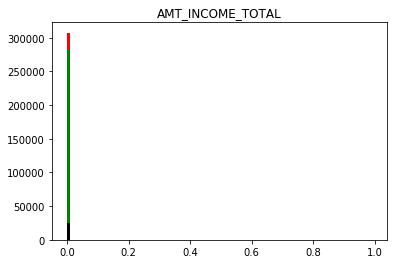

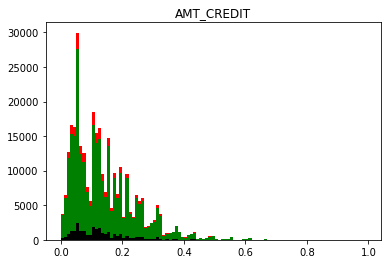

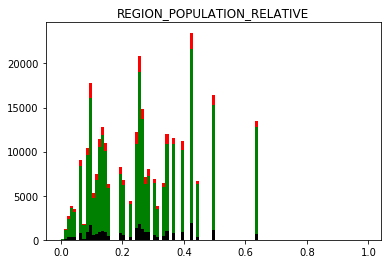

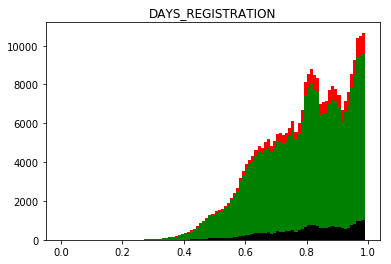

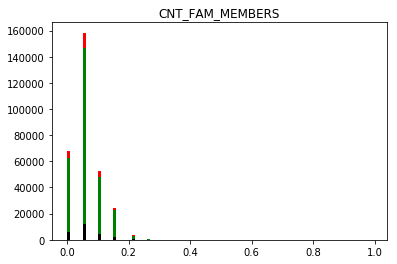

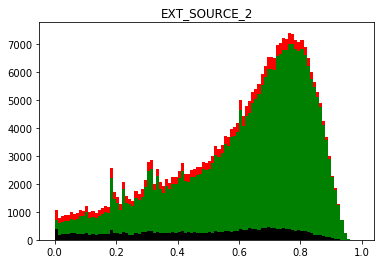

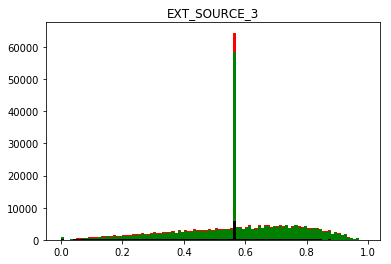

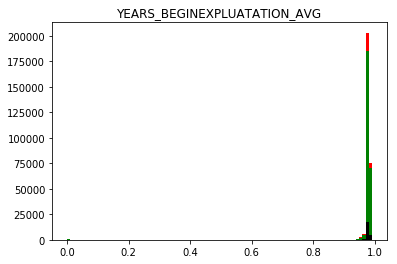

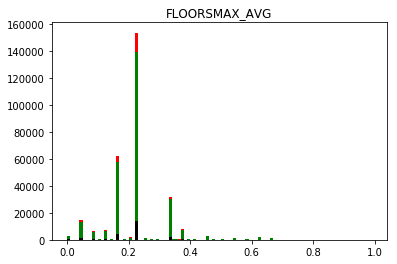

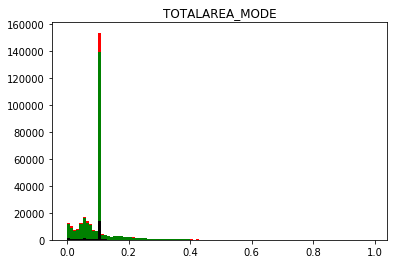

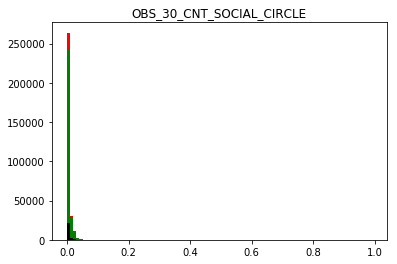

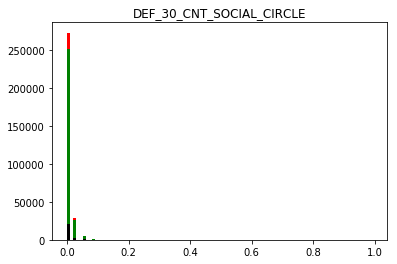

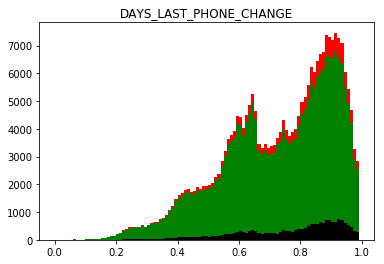

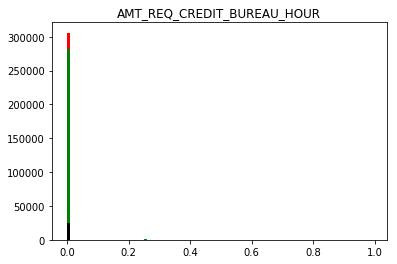

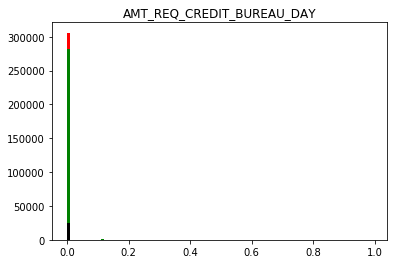

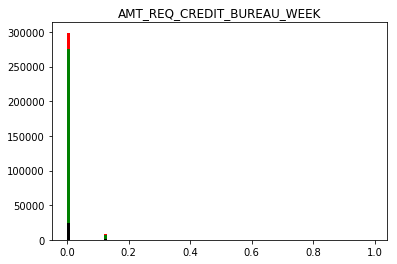

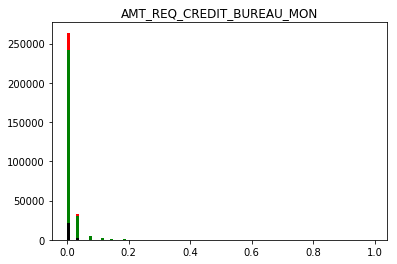

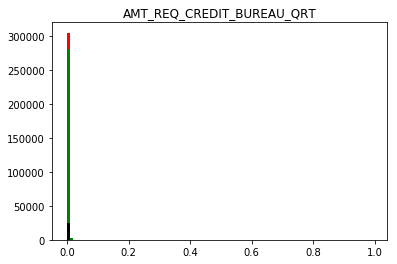

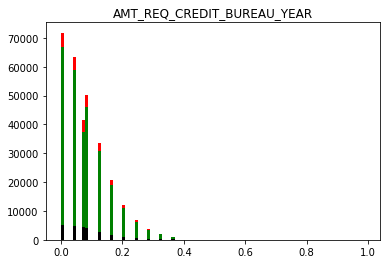

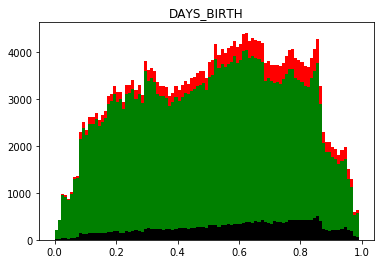

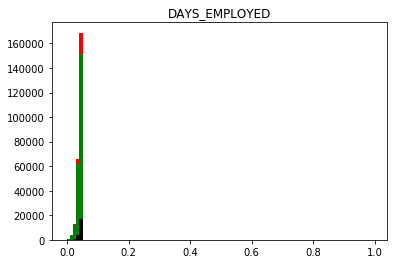

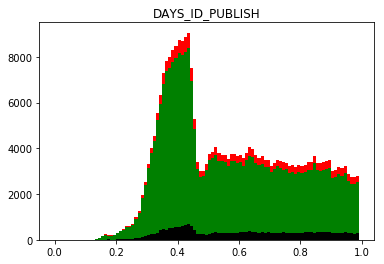

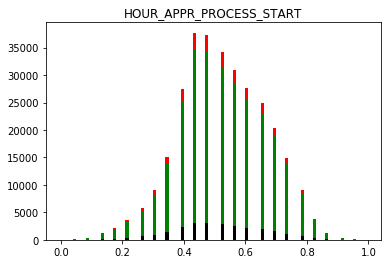

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

con_data_with_y = pd.concat([con_data, Y], axis=1)
con_data_0 = con_data_with_y[con_data_with_y['TARGET'] == 0]
con_data_1 = con_data_with_y[con_data_with_y['TARGET'] == 1]
bins = np.arange(0, 1, 0.01)
for i in range(len(con_feature)):
    plot_data = con_data.iloc[:, i]
    plt.hist(plot_data, bins=bins, color='red')
    plt.hist(con_data_0.iloc[:, i], bins=bins, color='green')
    plt.hist(con_data_1.iloc[:, i], bins=bins, color='black')
    plt.title(con_data.iloc[:, i].name)
    plt.show()

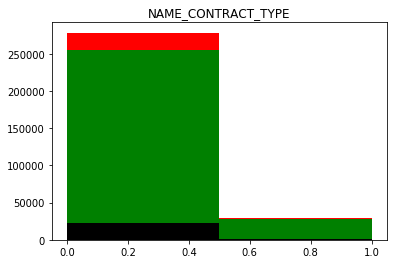

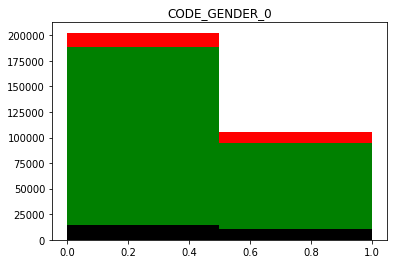

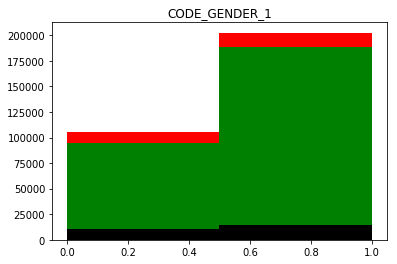

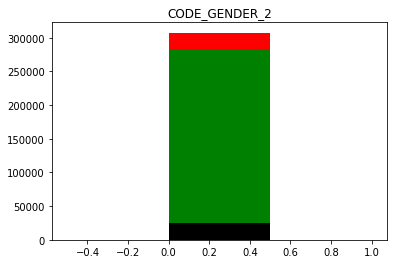

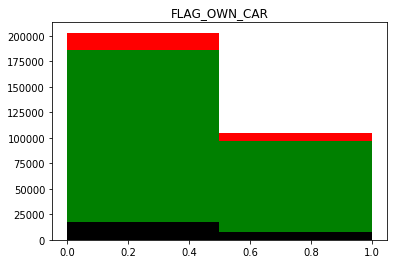

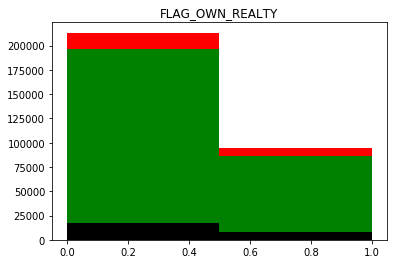

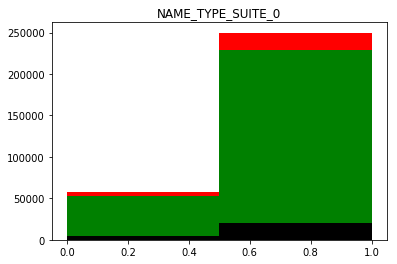

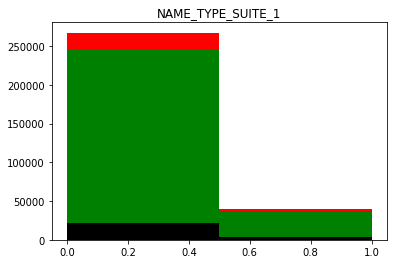

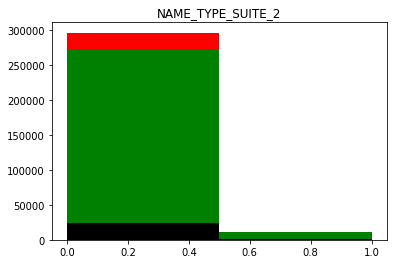

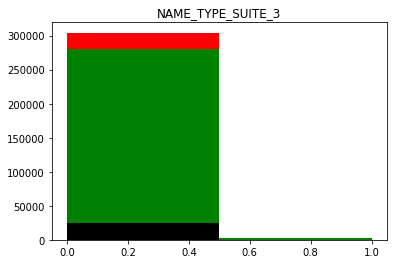

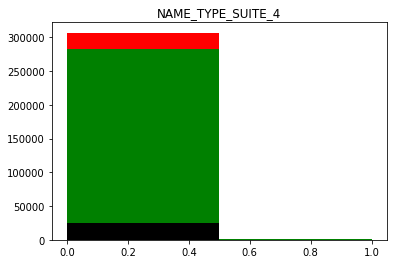

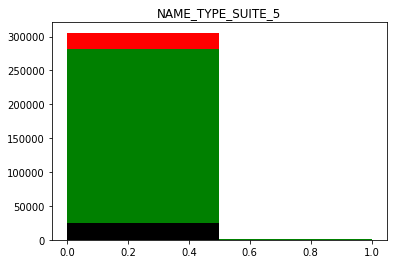

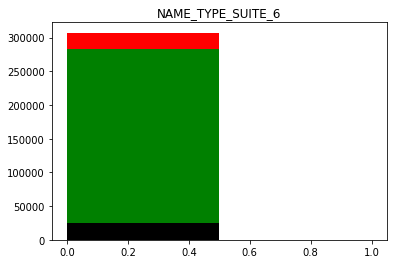

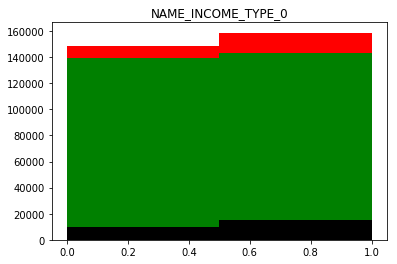

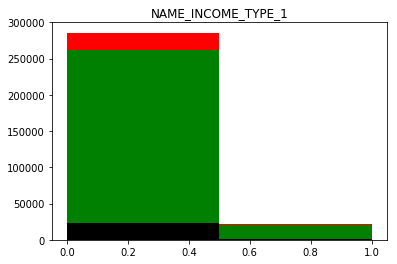

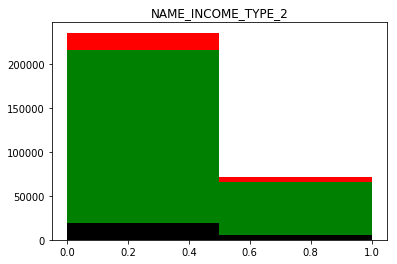

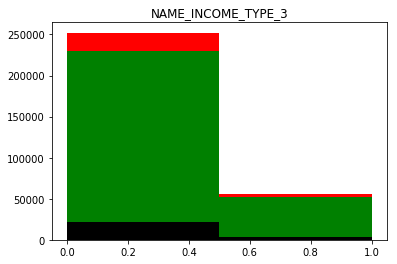

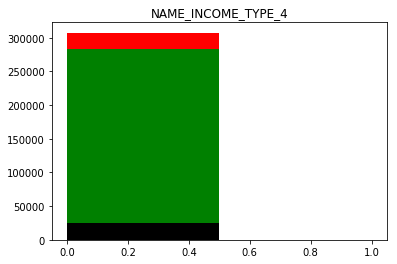

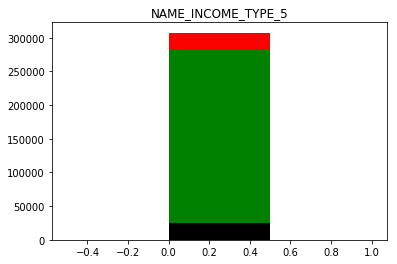

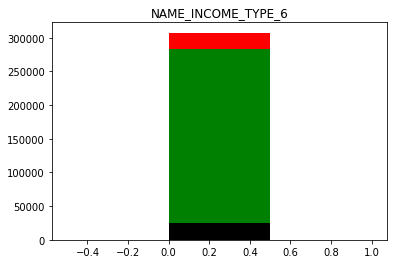

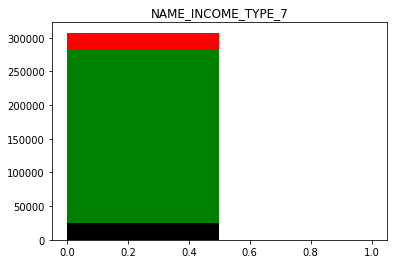

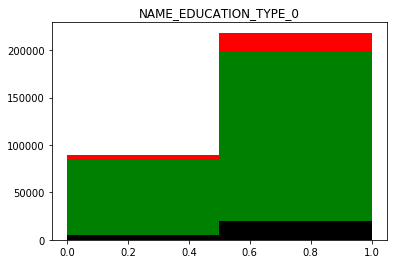

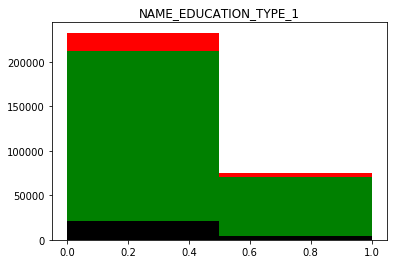

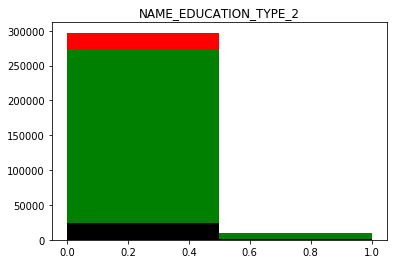

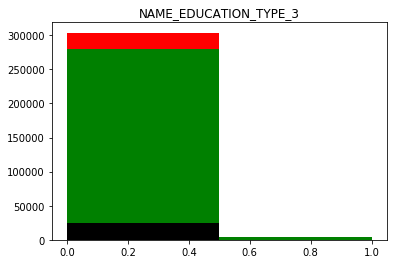

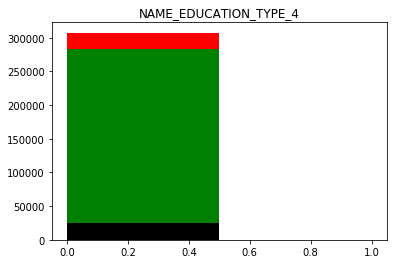

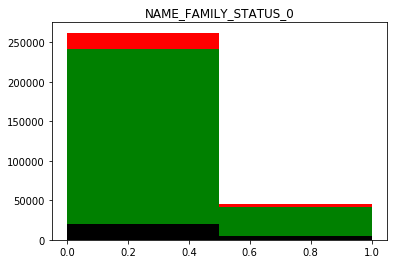

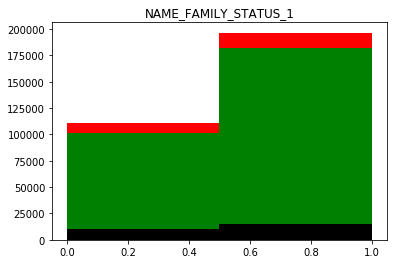

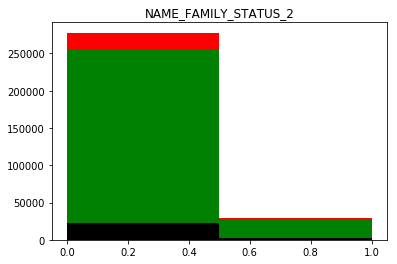

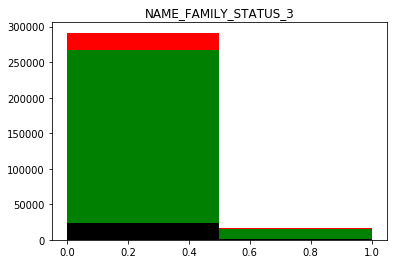

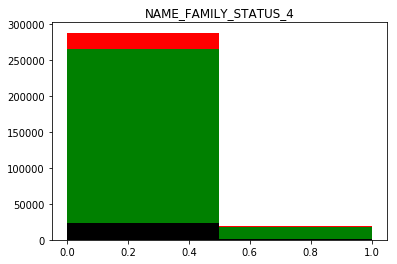

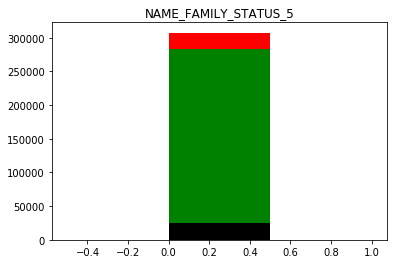

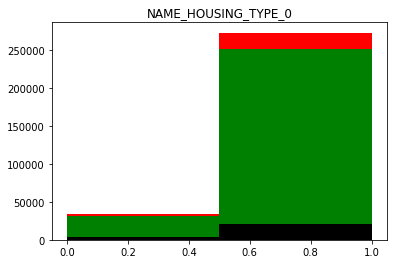

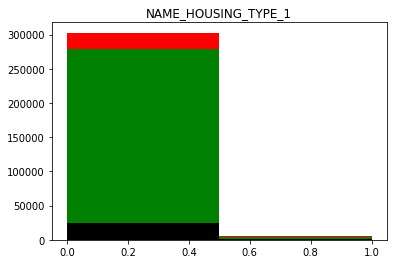

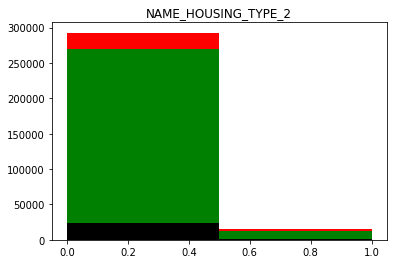

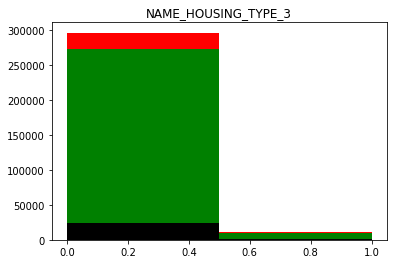

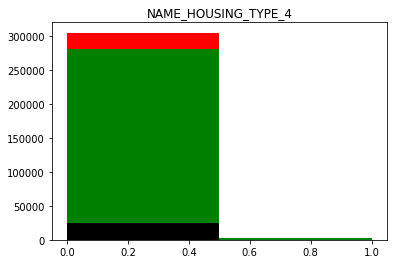

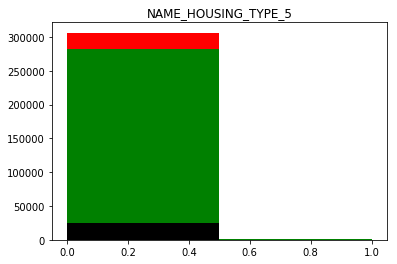

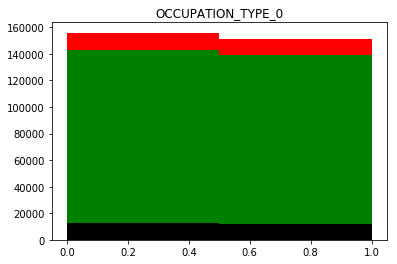

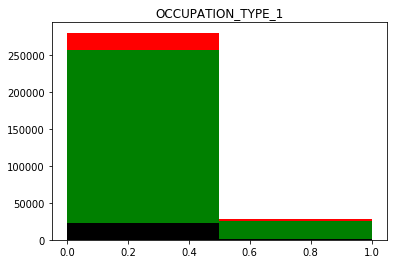

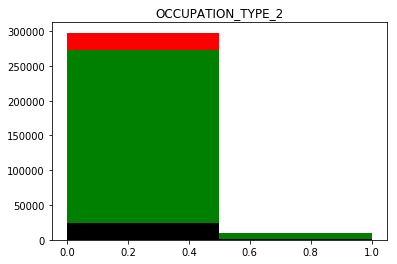

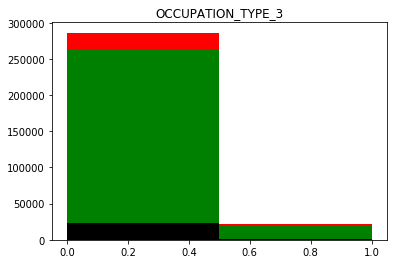

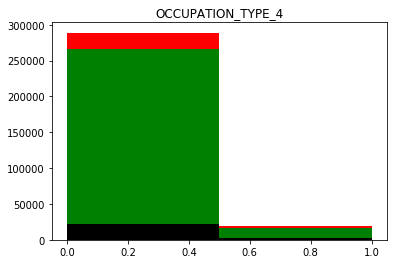

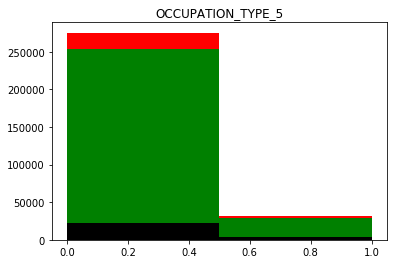

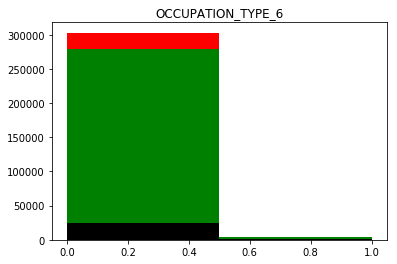

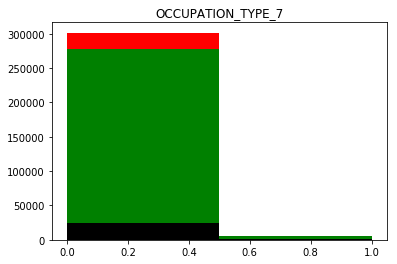

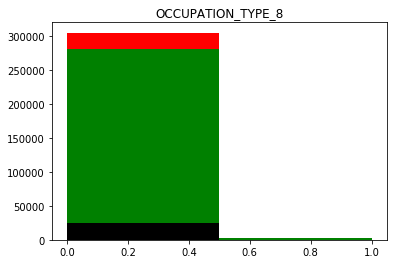

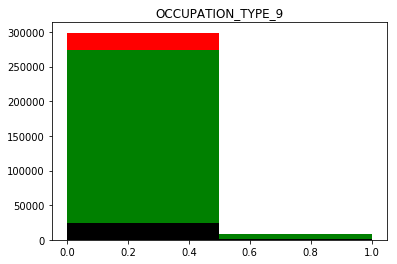

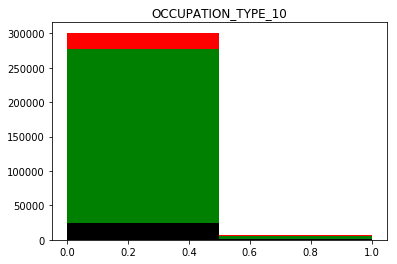

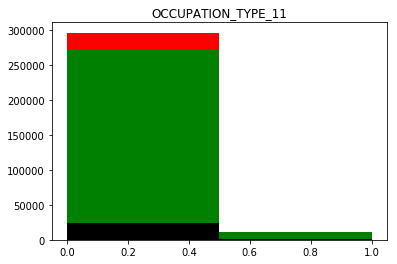

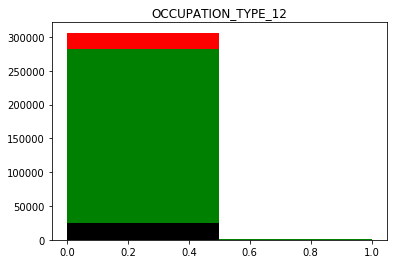

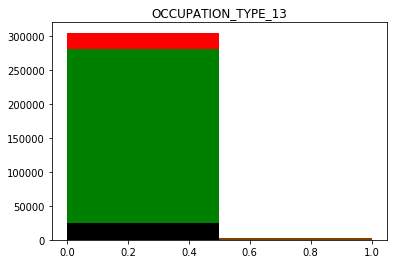

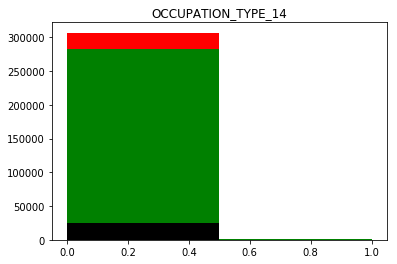

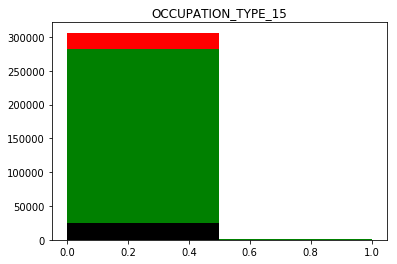

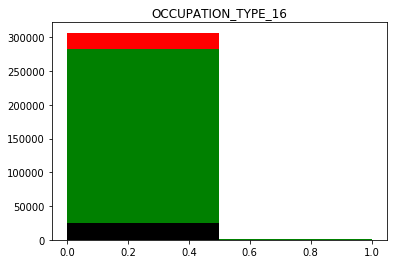

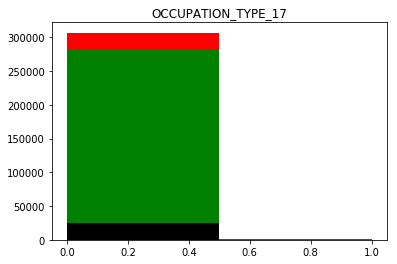

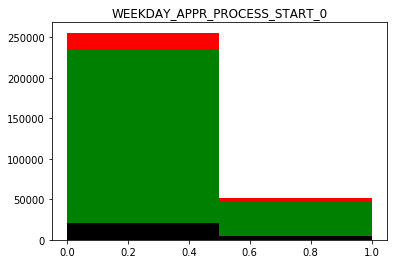

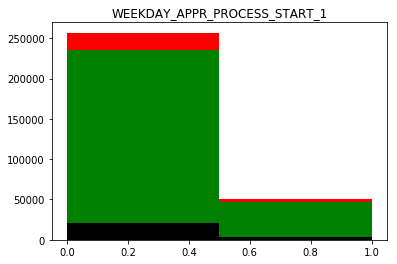

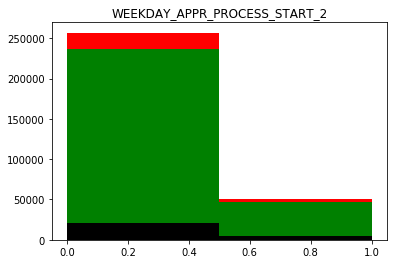

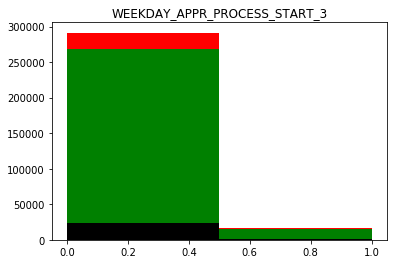

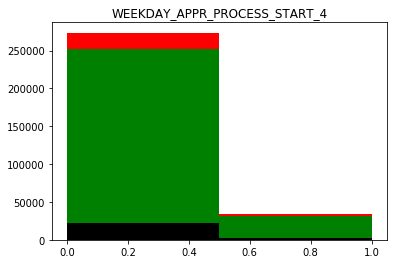

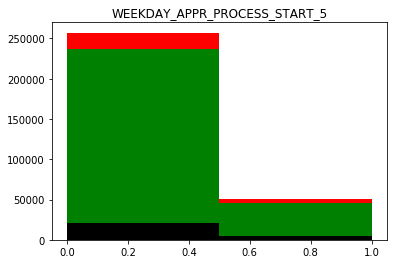

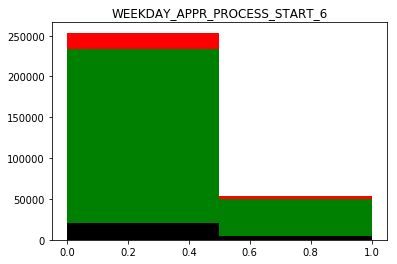

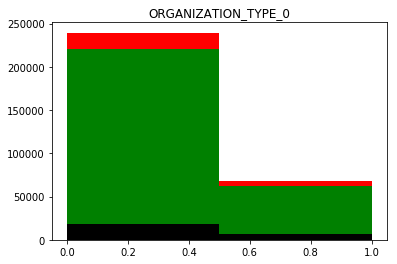

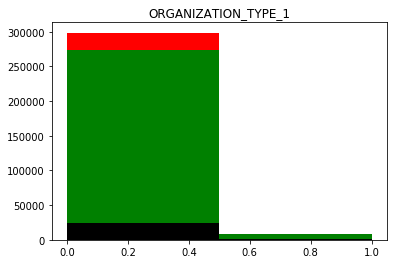

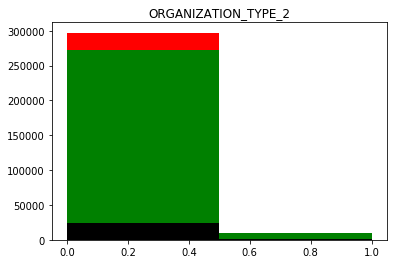

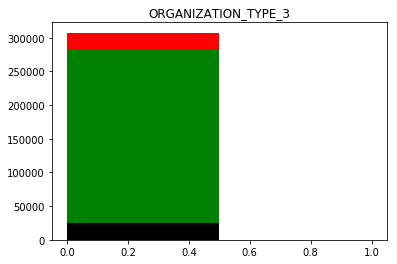

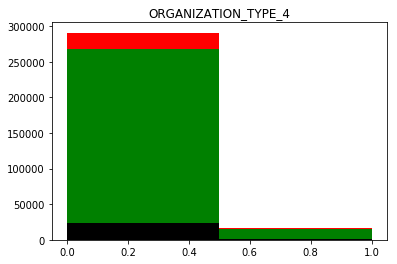

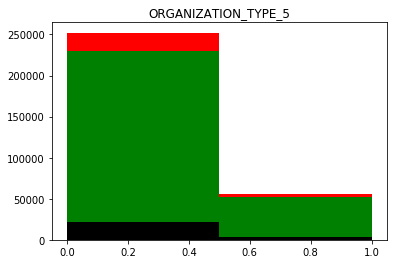

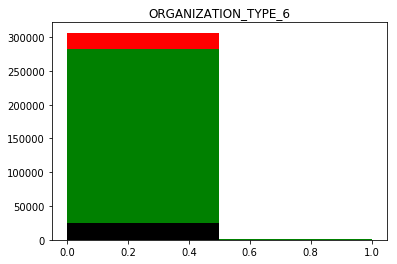

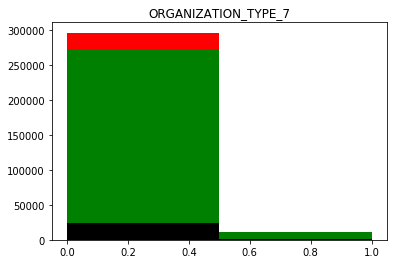

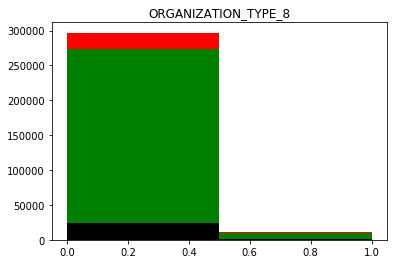

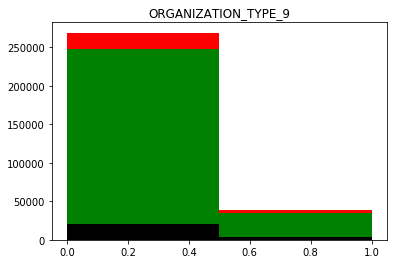

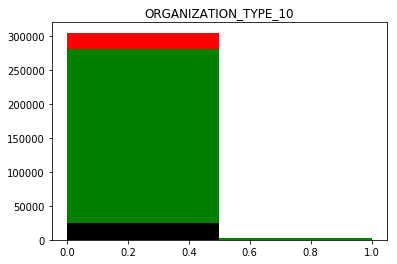

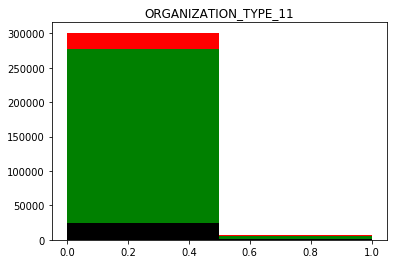

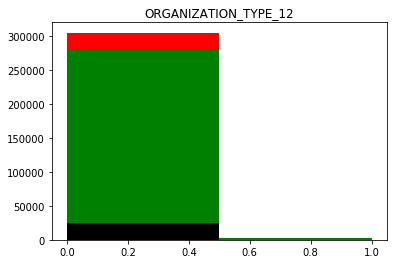

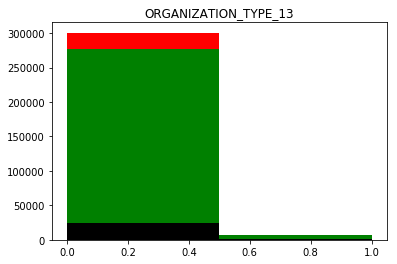

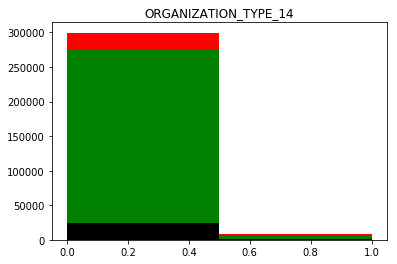

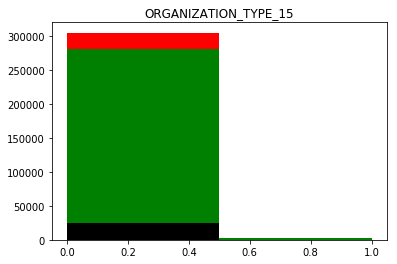

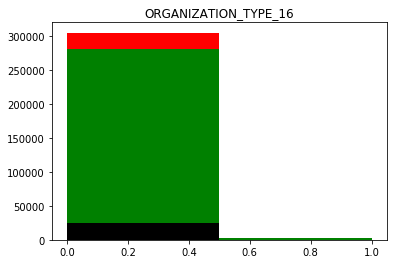

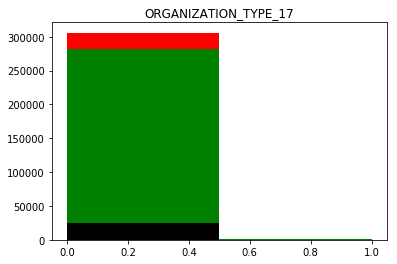

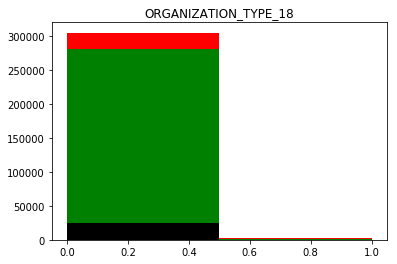

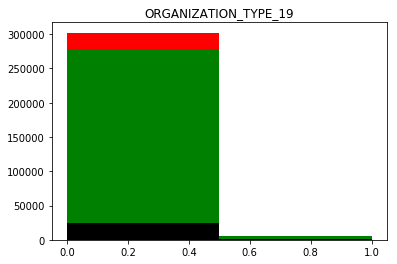

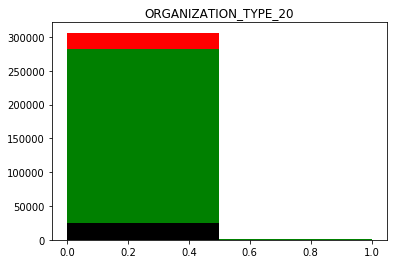

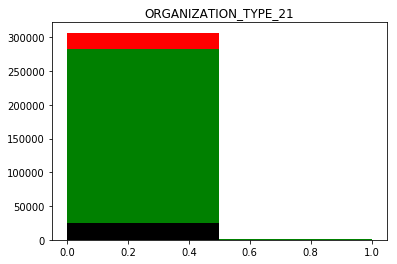

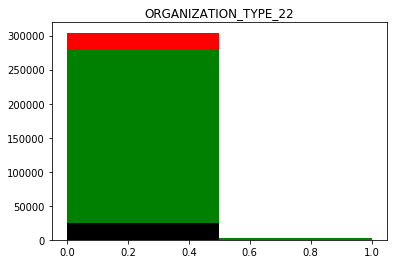

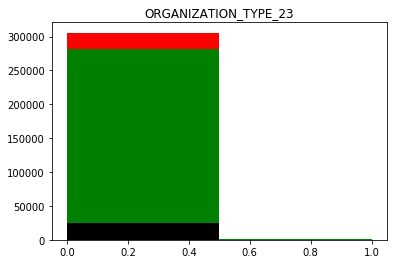

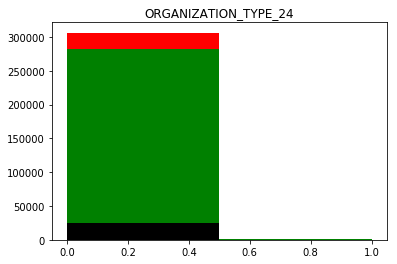

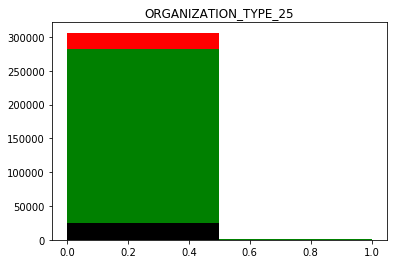

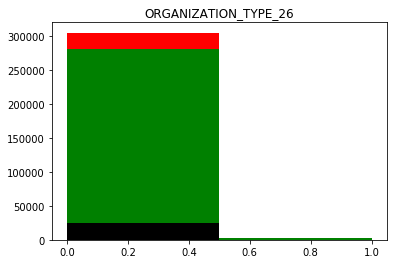

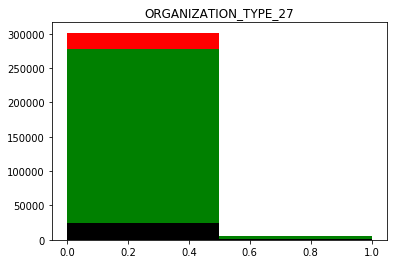

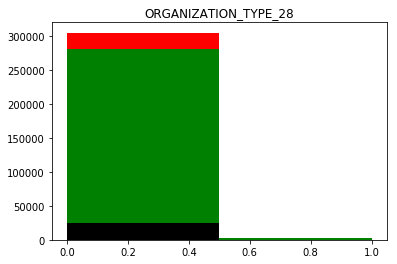

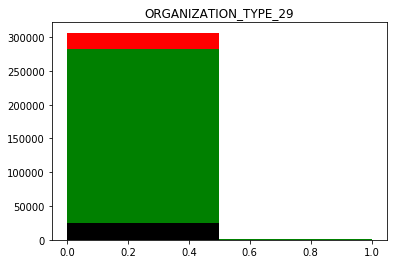

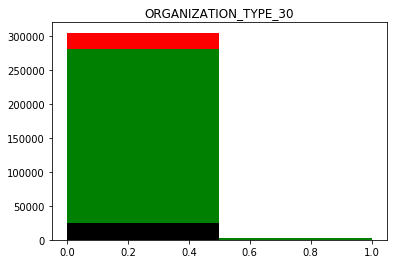

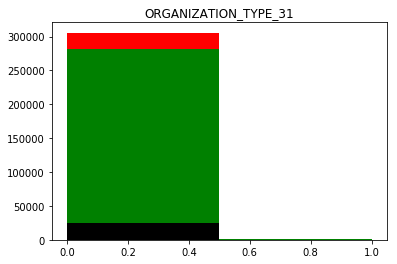

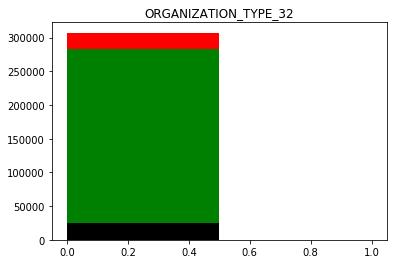

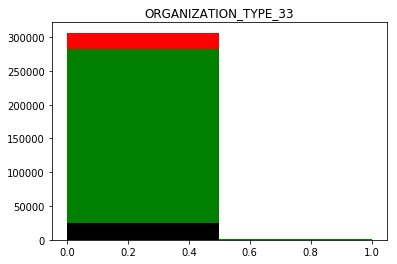

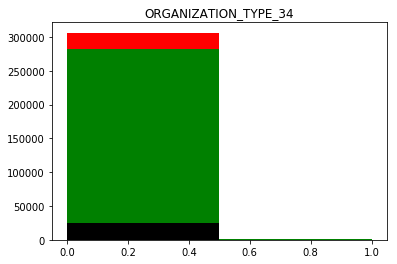

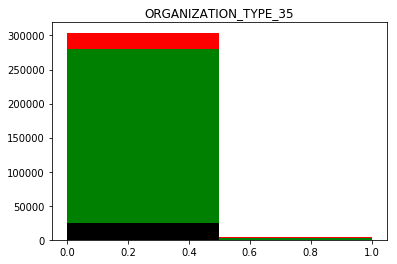

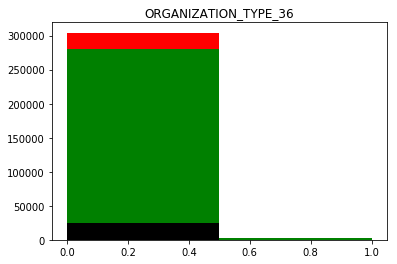

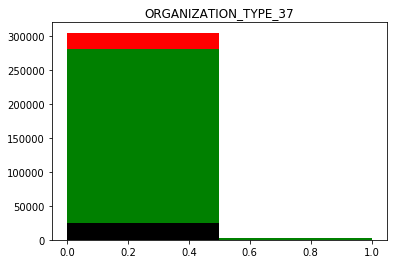

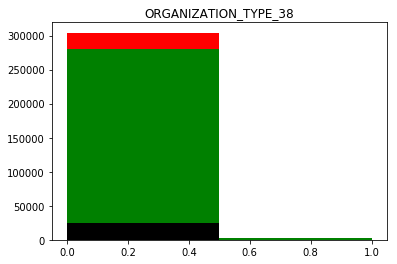

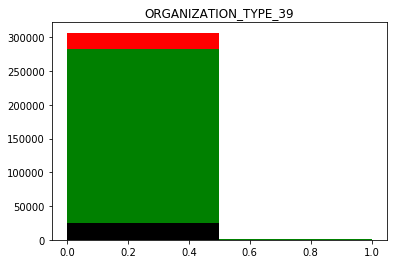

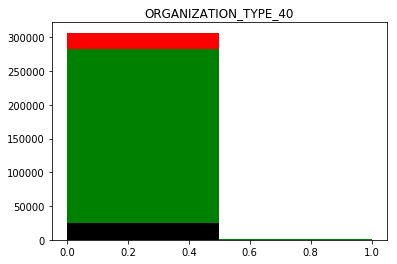

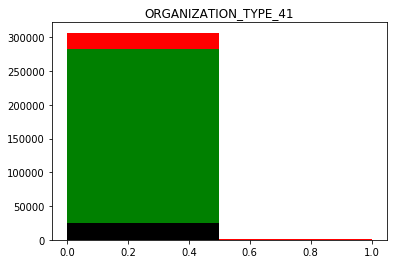

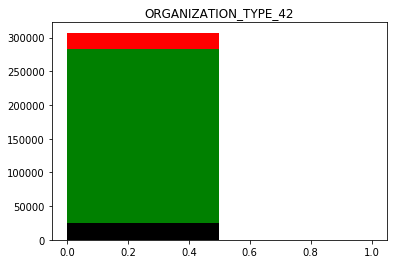

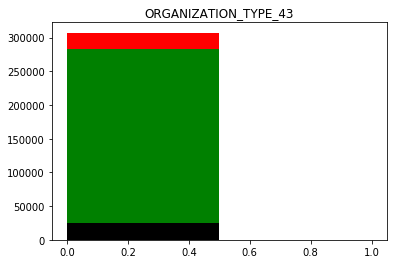

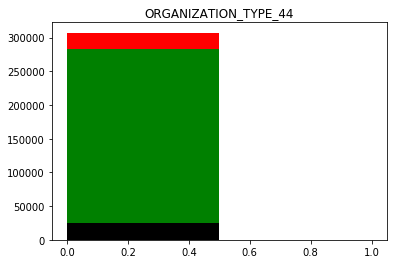

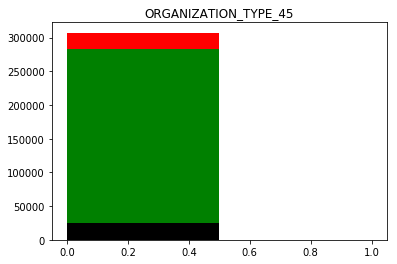

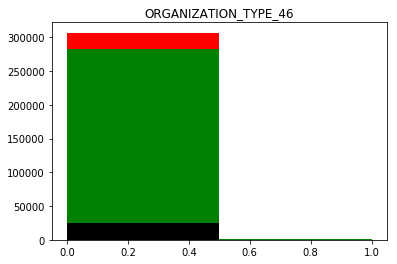

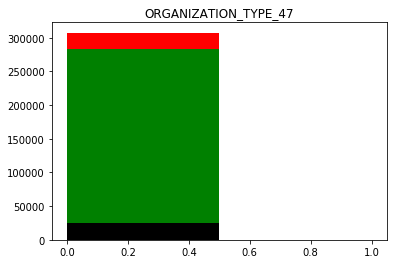

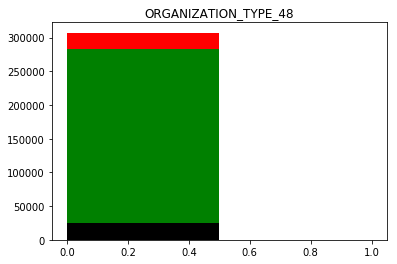

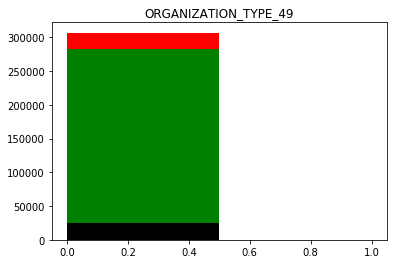

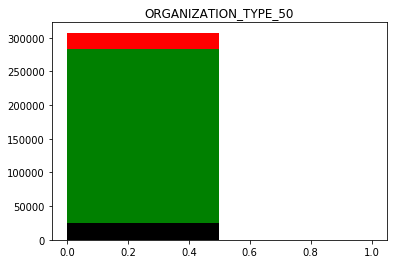

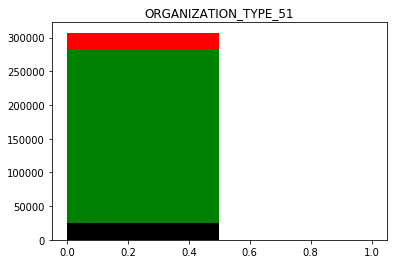

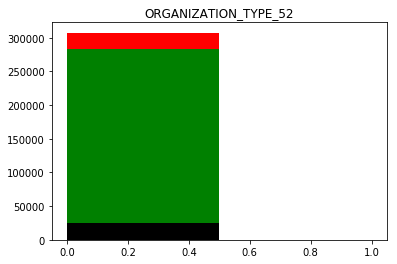

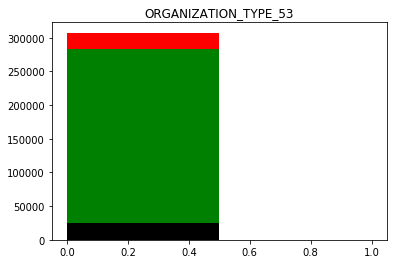

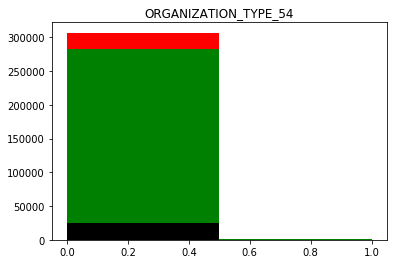

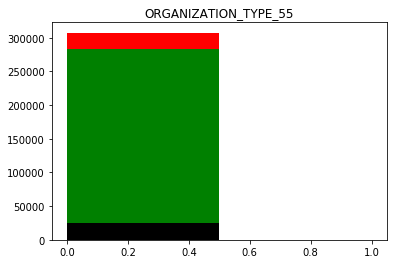

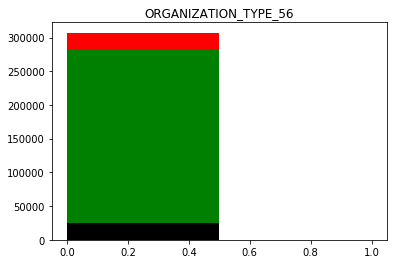

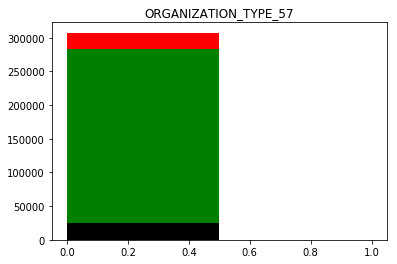

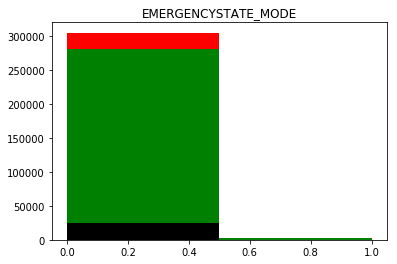

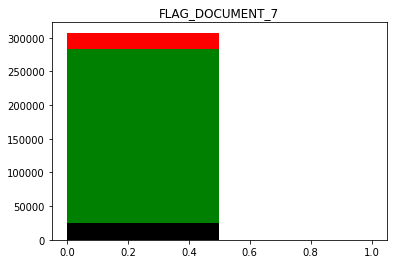

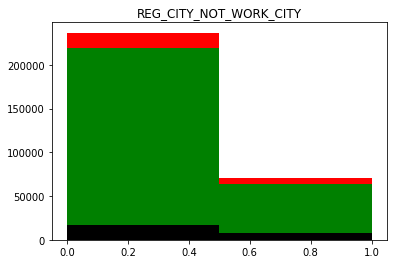

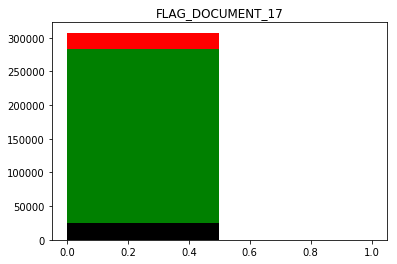

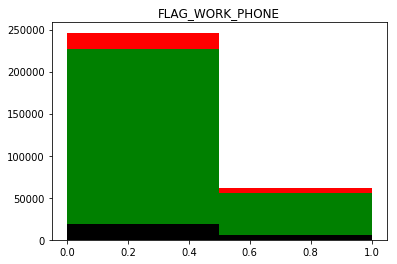

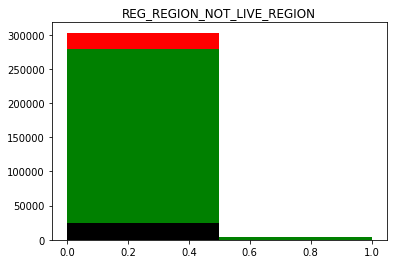

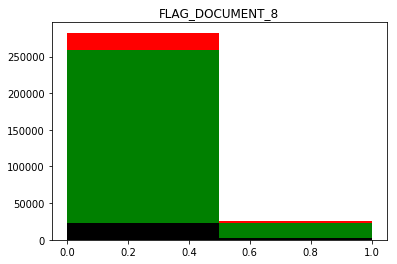

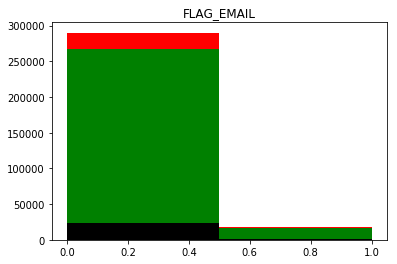

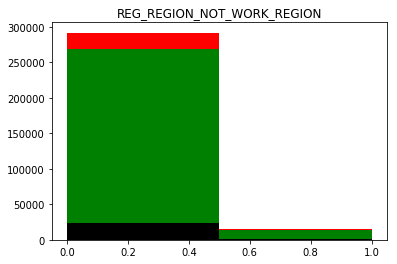

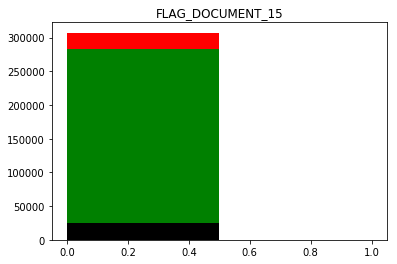

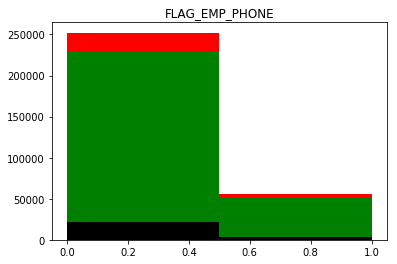

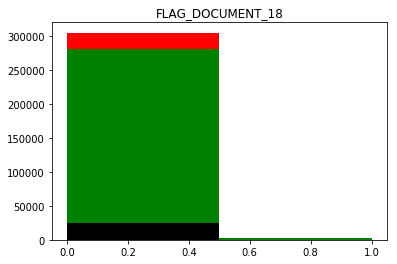

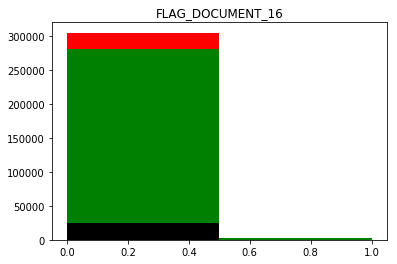

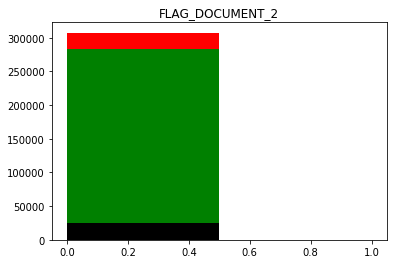

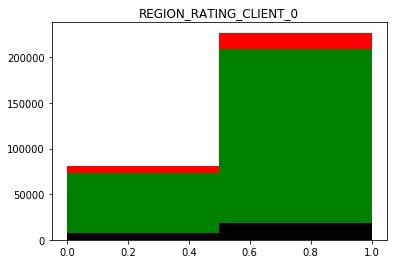

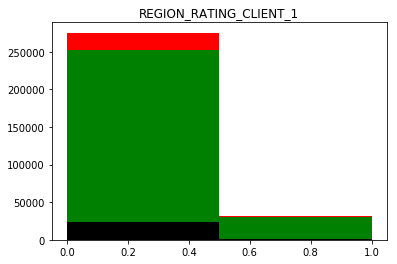

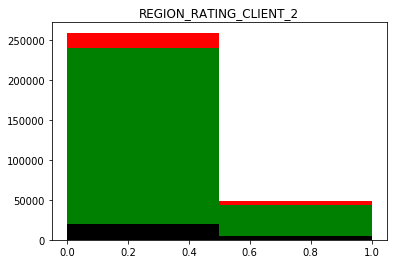

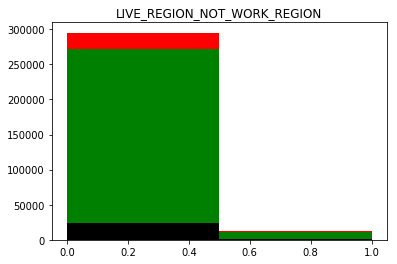

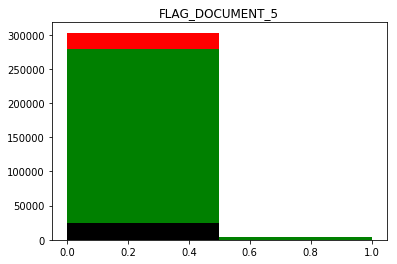

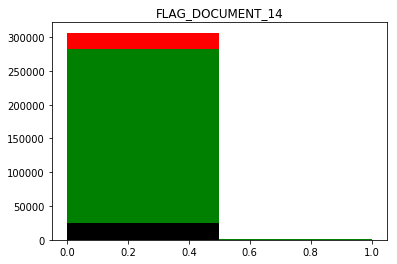

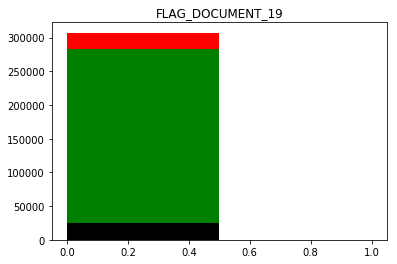

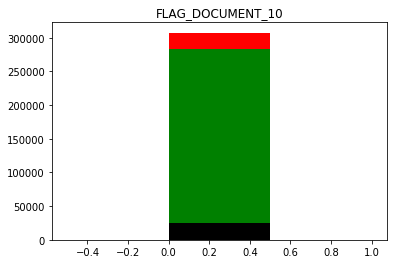

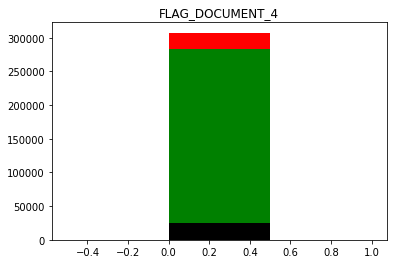

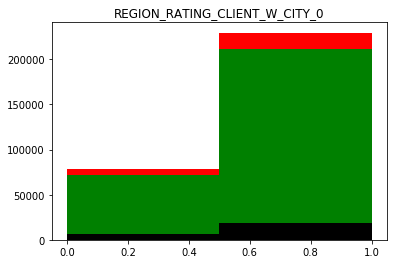

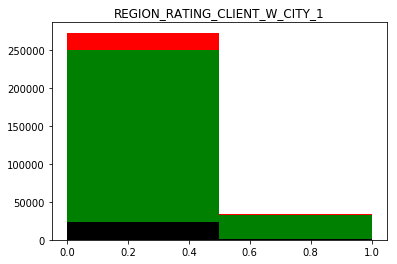

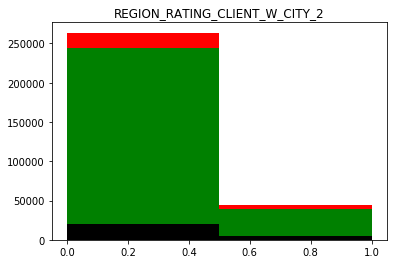

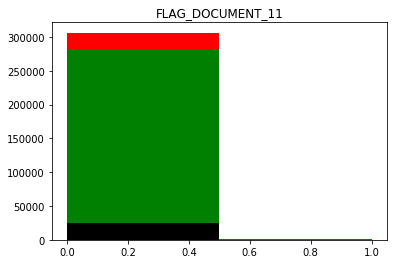

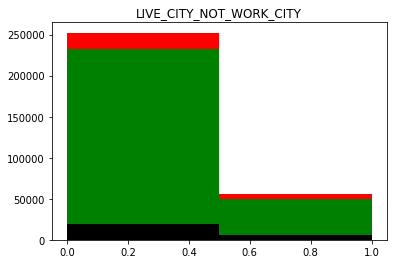

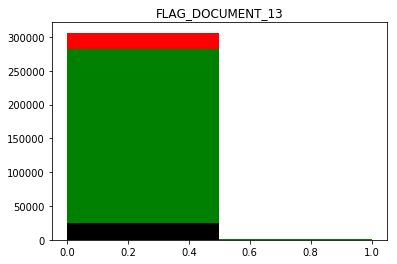

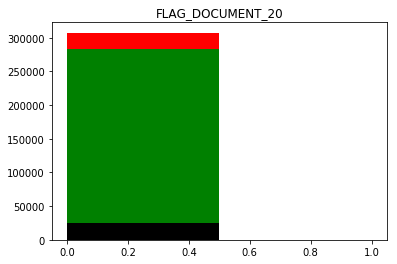

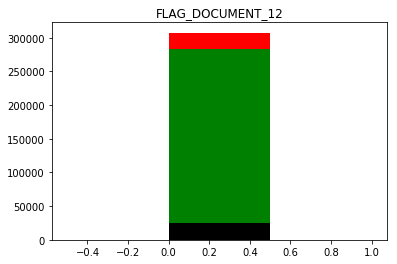

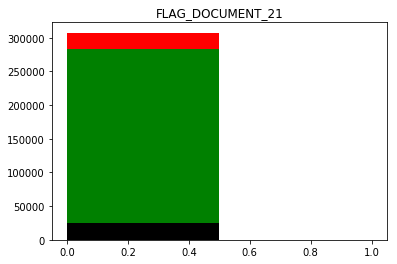

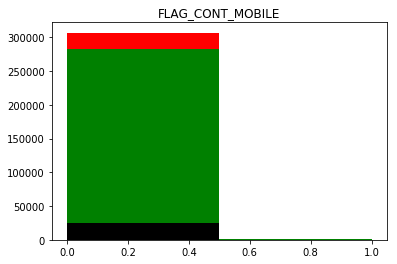

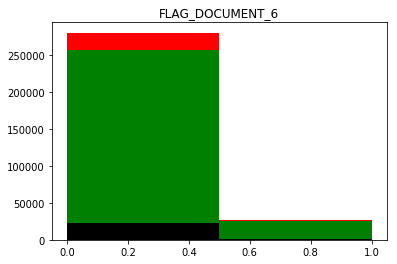

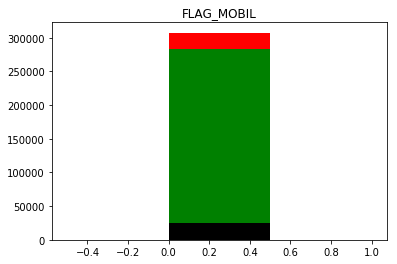

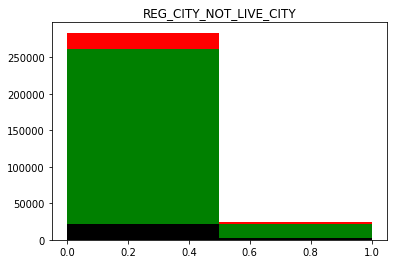

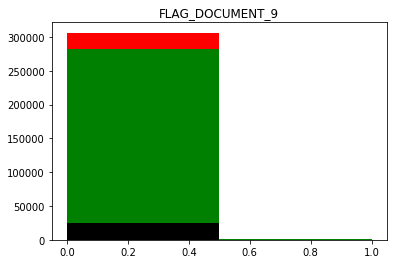

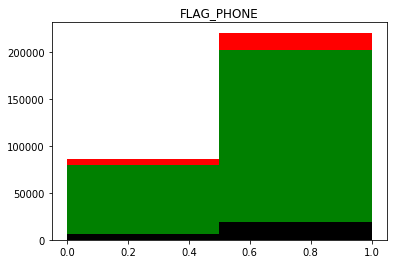

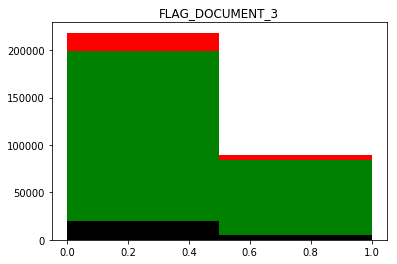

In [84]:
dis_data_with_y = pd.concat([dis_data, Y], axis=1)
dis_data_0 = dis_data_with_y[dis_data_with_y['TARGET'] == 0]
dis_data_1 = dis_data_with_y[dis_data_with_y['TARGET'] == 1]

for i in range(len(dis_feature)):
    bins = len(dis_data.iloc[:, i].unique())
    plot_data = dis_data.iloc[:, i]
    plt.hist(plot_data, bins=len(dis_data.iloc[:, i].unique()), color='red')
    plt.hist(dis_data_0.iloc[:, i], bins=bins, color='green')
    plt.hist(dis_data_1.iloc[:, i], bins=bins, color='black')
    plt.title(dis_data.iloc[:, i].name)
    plt.show()

In [85]:
con_same_list = []
for col in con_feature:
    if con_data[col].mean():
        con_same_list.append(con_data[col].std() / con_data[col].mean())
    else:
        con_same_list.append(0)
con_std_df = pd.DataFrame({"feature":con_feature,"std":con_same_list})
con_std_df = con_std_df.sort_values(['std'])
con_std_df
#连续型数据归一化后的标准差

,feature,std
7,YEARS_BEGINEXPLUATATION_AVG,0.043350
3,DAYS_REGISTRATION,0.178955
12,DAYS_LAST_PHONE_CHANGE,0.248354
22,HOUR_APPR_PROCESS_START,0.270722
6,EXT_SOURCE_3,0.341868
21,DAYS_ID_PUBLISH,0.359154
5,EXT_SOURCE_2,0.371030
8,FLOORSMAX_AVG,0.453066
19,DAYS_BIRTH,0.474759
2,REGION_POPULATION_RELATIVE,0.672136


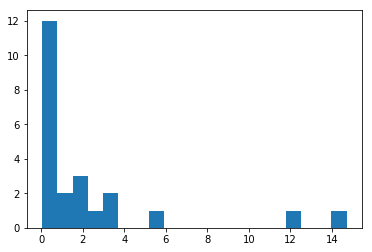

In [86]:
#连续数据标准差直方图
plt.hist(con_same_list, bins=20)
plt.show()

In [39]:
tmp_list = con_std_df[con_std_df['std'] > 0.01]['feature'].values
print(len(tmp_list))
print(tmp_list)
con_data = con_data[tmp_list]
con_feature = con_data.columns
X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_3.csv', encoding='utf-8_sig', index=False)
print(X.shape)
X.head()

38
['AMT_REQ_CREDIT_BUREAU_HOUR*DAYS_EMPLOYED'
 'AMT_REQ_CREDIT_BUREAU_WEEK*DAYS_EMPLOYED'
 'AMT_REQ_CREDIT_BUREAU_MON*AMT_REQ_CREDIT_BUREAU_YEAR'
 'AMT_REQ_CREDIT_BUREAU_DAY'
 'OBS_30_CNT_SOCIAL_CIRCLE*AMT_REQ_CREDIT_BUREAU_HOUR'
 'DEF_30_CNT_SOCIAL_CIRCLE' 'AMT_REQ_CREDIT_BUREAU_MON*DAYS_EMPLOYED'
 'DEF_30_CNT_SOCIAL_CIRCLE*AMT_REQ_CREDIT_BUREAU_QRT'
 'AMT_REQ_CREDIT_BUREAU_HOUR' 'AMT_REQ_CREDIT_BUREAU_WEEK'
 'AMT_REQ_CREDIT_BUREAU_QRT*DAYS_EMPLOYED'
 'DEF_30_CNT_SOCIAL_CIRCLE*DAYS_EMPLOYED' 'AMT_REQ_CREDIT_BUREAU_MON'
 'AMT_REQ_CREDIT_BUREAU_QRT*AMT_REQ_CREDIT_BUREAU_YEAR'
 'CNT_FAM_MEMBERS*AMT_REQ_CREDIT_BUREAU_YEAR'
 'OBS_30_CNT_SOCIAL_CIRCLE*DAYS_EMPLOYED' 'YEARS_BEGINEXPLUATATION_AVG'
 'AMT_REQ_CREDIT_BUREAU_YEAR*DAYS_EMPLOYED'
 'REGION_POPULATION_RELATIVE*CNT_FAM_MEMBERS' 'CNT_FAM_MEMBERS'
 'AMT_CREDIT*AMT_REQ_CREDIT_BUREAU_YEAR'
 'AMT_CREDIT*REGION_POPULATION_RELATIVE' 'AMT_CREDIT*CNT_FAM_MEMBERS'
 'AMT_REQ_CREDIT_BUREAU_YEAR' 'TOTALAREA_MODE' 'AMT_CREDIT'
 'FLOORSMAX_AVG' 'HO

,AMT_REQ_CREDIT_BUREAU_HOUR*DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_WEEK*DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_MON*AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE*AMT_REQ_CREDIT_BUREAU_HOUR,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON*DAYS_EMPLOYED,DEF_30_CNT_SOCIAL_CIRCLE*AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,FLAG_DOCUMENT_21,FLAG_CONT_MOBILE,FLAG_DOCUMENT_6,FLAG_MOBIL,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_9,FLAG_PHONE,FLAG_DOCUMENT_3
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,0.000083,0.000167,0.002566,0.000778,0.000711,0.000000,0.000472,0.0,0.001601,0.004295,...,0,0,0,0,0,0,0,0,1,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,1


In [40]:
instance_number = dis_data.shape[0]
dis_same_list = []
for col in dis_feature:
    dis_same_list.append(dis_data[col].value_counts().to_frame().reset_index()[col][0]/instance_number)
    
dis_same_rate_df = pd.DataFrame({"feature":dis_feature,"same_rate":dis_same_list})
dis_same_rate_df = dis_same_rate_df.sort_values(['same_rate'])
dis_same_rate_df
#离散特征同值比

,feature,same_rate
38,OCCUPATION_TYPE_0,0.507084
13,NAME_INCOME_TYPE_0,0.516320
27,NAME_FAMILY_STATUS_1,0.638780
2,CODE_GENDER_1,0.658344
1,CODE_GENDER_0,0.658357
4,FLAG_OWN_CAR,0.659892
5,FLAG_OWN_REALTY,0.693673
159,FLAG_DOCUMENT_3,0.710023
21,NAME_EDUCATION_TYPE_0,0.710189
158,FLAG_PHONE,0.718934


In [41]:
tmp_list = dis_same_rate_df[dis_same_rate_df['same_rate'] < 0.99]['feature'].values
print(len(tmp_list))
print(tmp_list)
dis_data = dis_data[tmp_list]
dis_feature = dis_data.columns
X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_4.csv', encoding='utf-8_sig', index=False)
print(X.shape)
X.head()

81
['OCCUPATION_TYPE_0' 'NAME_INCOME_TYPE_0' 'NAME_FAMILY_STATUS_1'
 'CODE_GENDER_1' 'CODE_GENDER_0' 'FLAG_OWN_CAR' 'FLAG_OWN_REALTY'
 'FLAG_DOCUMENT_3' 'NAME_EDUCATION_TYPE_0' 'FLAG_PHONE'
 'REGION_RATING_CLIENT_0' 'REGION_RATING_CLIENT_W_CITY_0'
 'NAME_EDUCATION_TYPE_1' 'NAME_INCOME_TYPE_2' 'REG_CITY_NOT_WORK_CITY'
 'ORGANIZATION_TYPE_0' 'FLAG_WORK_PHONE' 'NAME_TYPE_SUITE_0'
 'FLAG_EMP_PHONE' 'ORGANIZATION_TYPE_5' 'NAME_INCOME_TYPE_3'
 'LIVE_CITY_NOT_WORK_CITY' 'WEEKDAY_APPR_PROCESS_START_6'
 'WEEKDAY_APPR_PROCESS_START_0' 'WEEKDAY_APPR_PROCESS_START_1'
 'WEEKDAY_APPR_PROCESS_START_2' 'WEEKDAY_APPR_PROCESS_START_5'
 'REGION_RATING_CLIENT_2' 'NAME_FAMILY_STATUS_0'
 'REGION_RATING_CLIENT_W_CITY_2' 'NAME_TYPE_SUITE_1' 'ORGANIZATION_TYPE_9'
 'NAME_HOUSING_TYPE_0' 'REGION_RATING_CLIENT_W_CITY_1'
 'WEEKDAY_APPR_PROCESS_START_4' 'REGION_RATING_CLIENT_1'
 'OCCUPATION_TYPE_5' 'NAME_FAMILY_STATUS_2' 'NAME_CONTRACT_TYPE'
 'OCCUPATION_TYPE_1' 'FLAG_DOCUMENT_6' 'FLAG_DOCUMENT_8'
 'REG_CITY_NOT_LI

,AMT_REQ_CREDIT_BUREAU_HOUR*DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_WEEK*DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_MON*AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_DAY,OBS_30_CNT_SOCIAL_CIRCLE*AMT_REQ_CREDIT_BUREAU_HOUR,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON*DAYS_EMPLOYED,DEF_30_CNT_SOCIAL_CIRCLE*AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,...,NAME_HOUSING_TYPE_1,REG_REGION_NOT_LIVE_REGION,OCCUPATION_TYPE_6,FLAG_DOCUMENT_5,NAME_EDUCATION_TYPE_3,ORGANIZATION_TYPE_35,ORGANIZATION_TYPE_38,ORGANIZATION_TYPE_36,NAME_TYPE_SUITE_3,ORGANIZATION_TYPE_22
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.000083,0.000167,0.002566,0.000778,0.000711,0.000000,0.000472,0.0,0.001601,0.004295,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [43]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators: 决策树的数量，max_depth: 树的最大深度, criterion: 选择分裂特征的标准 可选'entropy','gini'
rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=0, verbose=1, criterion='gini')
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.5min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=1, warm_start=False)

In [44]:
importance = pd.DataFrame({'features':x_train.columns.values,'importance':rf.feature_importances_})
importance_result_sim = importance.sort_values(by='importance',ascending=True).style.bar()

importance_result_sim

,features,importance
115,ORGANIZATION_TYPE_38,0.000378204
99,OCCUPATION_TYPE_2,0.000480254
101,OCCUPATION_TYPE_9,0.000509677
92,OCCUPATION_TYPE_11,0.000533503
100,ORGANIZATION_TYPE_1,0.000563751
106,ORGANIZATION_TYPE_27,0.00060323
97,ORGANIZATION_TYPE_2,0.000642086
103,ORGANIZATION_TYPE_13,0.000656681
118,ORGANIZATION_TYPE_22,0.000691269
94,ORGANIZATION_TYPE_7,0.000692585


In [45]:
selected_feature = importance[importance['importance'] > 0.003]['features'].values

In [46]:
con_feature = list(set(con_feature).intersection(set(selected_feature)))
dis_feature = list(set(dis_feature).intersection(set(selected_feature)))

con_data = con_data[con_feature]
dis_data = dis_data[dis_feature]
X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_5.csv', encoding='utf-8_sig', index=False)

In [47]:
p_list = []
for col in dis_feature:
    dis_chi2 = Dis_chi2(dis_data[col], Y)
    p_list.append(dis_chi2.p)

chi2 = pd.DataFrame({'feature':dis_feature, 'p':p_list})
chi2

,feature,p
0,NAME_EDUCATION_TYPE_1,4.439836e-216
1,CODE_GENDER_1,4.837676e-202
2,NAME_INCOME_TYPE_3,1.006676e-144
3,NAME_FAMILY_STATUS_1,8.342817e-44
4,FLAG_OWN_CAR,9.330994e-34
5,REG_CITY_NOT_WORK_CITY,7.981277e-176
6,REGION_RATING_CLIENT_2,3.492564e-156
7,REGION_RATING_CLIENT_W_CITY_2,4.540037e-168
8,CODE_GENDER_0,4.183493e-202
9,FLAG_EMP_PHONE,2.530606e-143


In [48]:
chi2.sort_values('p')

,feature,p
12,NAME_INCOME_TYPE_0,7.225960e-223
0,NAME_EDUCATION_TYPE_1,4.439836e-216
8,CODE_GENDER_0,4.183493e-202
1,CODE_GENDER_1,4.837676e-202
5,REG_CITY_NOT_WORK_CITY,7.981277e-176
7,REGION_RATING_CLIENT_W_CITY_2,4.540037e-168
14,NAME_EDUCATION_TYPE_0,6.091193e-168
6,REGION_RATING_CLIENT_2,3.492564e-156
2,NAME_INCOME_TYPE_3,1.006676e-144
10,ORGANIZATION_TYPE_5,2.362427e-143


In [49]:
selected_feature = chi2[chi2['p'] < 0.05]['feature'].values
dis_feature = list(set(dis_feature).intersection(set(selected_feature)))

dis_data = dis_data[dis_feature]
X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_6.csv', encoding='utf-8_sig', index=False)
len(dis_feature)

15

In [50]:
X.shape

(307511, 52)

In [51]:
result[result['TARGET'] == 0 ].shape

(282686, 53)

In [52]:
result[result['TARGET'] == 1].shape

(24825, 53)